# 병원 재무데이터와 머신러닝을 이용한 병원 개업/폐업 분류 예측

In [108]:
import pandas as pd
import numpy as np
import sklearn

In [109]:
train = pd.read_csv("../data/병원개폐업분류/train.csv")
test = pd.read_csv("../data/병원개폐업분류/test.csv")

In [110]:
print(train.shape, test.shape)

(301, 58) (127, 58)


In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   OC                  301 non-null    object 
 2   sido                301 non-null    object 
 3   sgg                 301 non-null    int64  
 4   openDate            301 non-null    int64  
 5   bedCount            296 non-null    float64
 6   instkind            300 non-null    object 
 7   revenue1            293 non-null    float64
 8   salescost1          293 non-null    float64
 9   sga1                293 non-null    float64
 10  salary1             293 non-null    float64
 11  noi1                293 non-null    float64
 12  noe1                293 non-null    float64
 13  interest1           293 non-null    float64
 14  ctax1               293 non-null    float64
 15  profit1             293 non-null    float64
 16  liquidAs

In [112]:
train.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


In [113]:
train.columns

Index(['inst_id', 'OC', 'sido', 'sgg', 'openDate', 'bedCount', 'instkind',
       'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1',
       'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2',
       'employee1', 'employee2', 'ownerChange'],
      dtype='object')

inst_id - 각 파일에서의 병원 고유 번호

OC – 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함

sido – 병원의 광역 지역 정보

sgg – 병원의 시군구 자료

openDate – 병원 설립일

bedCount - 병원이 갖추고 있는 병상의 수

instkind – 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류

·        종합병원 : 입원환자 100명 이상 수용 가능

·        병원 : 입원 환자 30명 이상 100명 미만 수용 가능

·        의원 : 입원 환자 30명 이하 수용 가능

·        한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관.  

 

revenue1 – 매출액, 2017(회계년도)년 데이터를 의미함

salescost1 – 매출원가, 2017(회계년도)년 데이터를 의미함

sga1 - 판매비와 관리비, 2017(회계년도)년 데이터를 의미함

salary1 – 급여, 2017(회계년도)년 데이터를 의미함

noi1 – 영업외수익, 2017(회계년도)년 데이터를 의미함

noe1 – 영업외비용, 2017(회계년도)년 데이터를 의미함

Interest1 – 이자비용, 2017(회계년도)년 데이터를 의미함

ctax1 – 법인세비용, 2017(회계년도)년 데이터를 의미함

Profit1 – 당기순이익, 2017(회계년도)년 데이터를 의미함

liquidAsset1 – 유동자산, 2017(회계년도)년 데이터를 의미함

quickAsset1 – 당좌자산, 2017(회계년도)년 데이터를 의미함

receivableS1 - 미수금(단기), 2017(회계년도)년 데이터를 의미함

inventoryAsset1 – 재고자산, 2017(회계년도)년 데이터를 의미함

nonCAsset1 – 비유동자산, 2017(회계년도)년 데이터를 의미함

tanAsset1 – 유형자산, 2017(회계년도)년 데이터를 의미함

OnonCAsset1 - 기타 비유동자산, 2017(회계년도)년 데이터를 의미함

receivableL1 – 장기미수금, 2017(회계년도)년 데이터를 의미함

debt1 – 부채총계, 2017(회계년도)년 데이터를 의미함

liquidLiabilities1 – 유동부채, 2017(회계년도)년 데이터를 의미함

shortLoan1 – 단기차입금, 2017(회계년도)년 데이터를 의미함

NCLiabilities1 – 비유동부채, 2017(회계년도)년 데이터를 의미함

longLoan1 – 장기차입금, 2017(회계년도)년 데이터를 의미함

netAsset1 – 순자산총계, 2017(회계년도)년 데이터를 의미함

surplus1 – 이익잉여금, 2017(회계년도)년 데이터를 의미함

# 모델링

## Data split

In [114]:
train = train.dropna(axis=0)
#test = test.dropna(axis=0)

In [115]:
train_prepared = train[[ 'sgg', 'openDate', 'bedCount', 'revenue1',
       'salescost1', 'sga1', 'salary1', 'noi1', 'noe1', 'interest1', 'ctax1',
       'profit1', 'liquidAsset1', 'quickAsset1', 'receivableS1',
       'inventoryAsset1', 'nonCAsset1', 'tanAsset1', 'OnonCAsset1',
       'receivableL1', 'debt1', 'liquidLiabilities1', 'shortLoan1',
       'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1', 'revenue2',
       'salescost2', 'sga2', 'salary2', 'noi2', 'noe2', 'interest2', 'ctax2',
       'profit2', 'liquidAsset2', 'quickAsset2', 'receivableS2',
       'inventoryAsset2', 'nonCAsset2', 'tanAsset2', 'OnonCAsset2',
       'receivableL2', 'debt2', 'liquidLiabilities2', 'shortLoan2',
       'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2', 'employee1',
       'employee2']]

train_label = train["OC"]

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_prepared, train_label, test_size=0.3, random_state=0)

print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

X_train 크기: (193, 53)
y_train 크기: (193,)
X_test 크기: (84, 53)
y_test 크기: (84,)


In [117]:
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [118]:
from IPython.display import Image
import pydotplus
import graphviz

In [119]:
test_label.shape

(0,)

In [120]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("훈련 데이터 결과:", tree.score(X_train, y_train))
print("검증 데이터 결과:", tree.score(X_test, y_test))
# 훈련 데이터 정확도가 검증 데이터보다 높은 경우에는 overfiting의 문제 있을 수 있음
# 이 경우는 둘다 높기 때문에 문제 X

훈련 데이터 결과: 1.0
검증 데이터 결과: 0.9404761904761905


In [121]:
from sklearn.tree import export_graphviz

# Create DOT data
dot_data = export_graphviz(tree, out_file=None,
                          class_names=train['OC'].unique(),
                          feature_names=train_prepared.columns,
                          impurity=False,
                          filled=True)

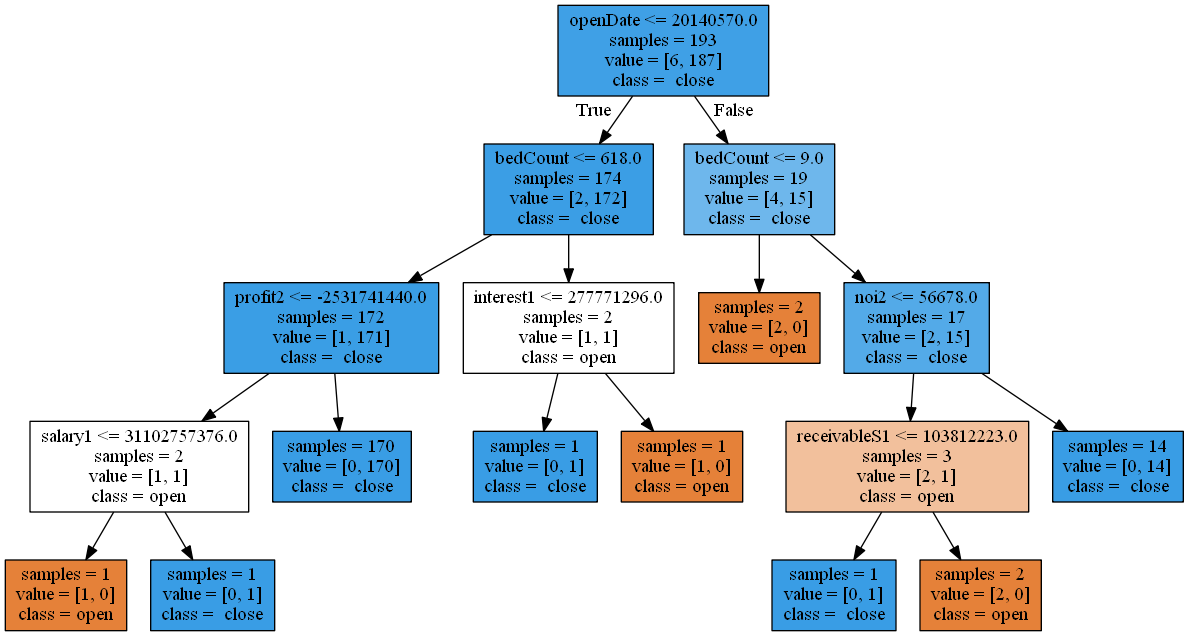

In [122]:
graph = pydotplus.graph_from_dot_data(dot_data) # Draw graph
Image(graph.create_png()) 

In [123]:
tree2 = DecisionTreeClassifier(max_depth=2, random_state=0)
tree2.fit(X_train, y_train)

# max_depth는 가지치기 했다는 뜻
# 검증 데이터 결과가 올라갔다면 과적합 문제 해소되었다는 뜻
# 이 경우에 가지치기 효과 X

print("훈련 데이터 결과:", tree2.score(X_train, y_train))
print("검증 데이터 결과:", tree2.score(X_test, y_test))

훈련 데이터 결과: 0.9792746113989638
검증 데이터 결과: 0.9642857142857143


In [129]:
dot_data = export_graphviz(tree2, out_file=None,
                          class_names=train['OC'].unique(),
                          feature_names=X_train.columns,
                          impurity=False,
                          filled=True)

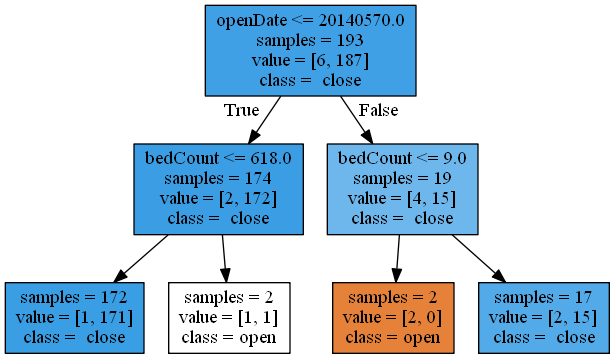

In [130]:
graph = pydotplus.graph_from_dot_data(dot_data) # Draw graph
Image(graph.create_png())

In [156]:
tree2.predict(X_test[:])

array(['open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', ' close', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', ' close', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open'], dtype=object)

In [157]:
y_test.value_counts()

open      83
 close     1
Name: OC, dtype: int64

In [23]:
# Create .png & pdf.files
graph.write_png('../data/병원개폐업분류/hospital.png')
graph.write_pdf('../data/병원개폐업분류/hospital.pdf')

True